In [1]:
# Step 1: Load Required Libraries and Dataset
import pandas as pd
import numpy as np

# Optional: For visualization later
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dataset.csv")  # Make sure the file is in your current working directory or adjust the path

# Basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Preview data
df.head()


Dataset Shape: (6417106, 5)

Column Names: ['app_id', 'app_name', 'review_text', 'review_score', 'review_votes']


,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [3]:
# Step 2: Check for missing values and data types
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Optional: Quick overview of numerical columns
df.describe()


Missing Values:
 app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

Data Types:
 app_id           int64
app_name        object
review_text     object
review_score     int64
review_votes     int64
dtype: object


,app_id,review_score,review_votes
count,6.417106e+06,6.417106e+06,6.417106e+06
mean,2.274695e+05,6.394992e-01,1.472446e-01
std,1.260451e+05,7.687918e-01,3.543496e-01
min,1.000000e+01,-1.000000e+00,0.000000e+00
25%,2.018100e+05,1.000000e+00,0.000000e+00
50%,2.391600e+05,1.000000e+00,0.000000e+00
75%,3.056200e+05,1.000000e+00,0.000000e+00
max,5.653400e+05,1.000000e+00,1.000000e+00


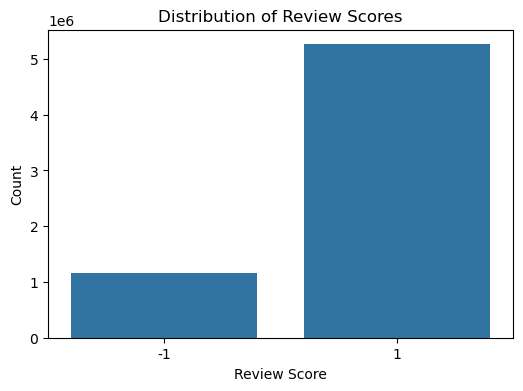

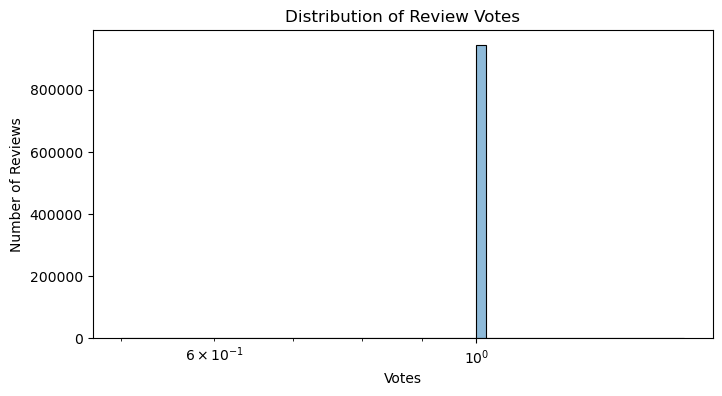

In [5]:
# Step 3: Visualizing review_score distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='review_score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# Review Votes distribution (non-zero votes only for meaningful display)
plt.figure(figsize=(8, 4))
sns.histplot(df[df['review_votes'] > 0]['review_votes'], bins=50, kde=True)
plt.title('Distribution of Review Votes')
plt.xlabel('Votes')
plt.ylabel('Number of Reviews')
plt.xscale('log')  # Skewed distribution likely
plt.show()


/var/folders/81/vg4jc45d24qfy4y09fmt7ftm0000gn/T/ipykernel_58716/585609183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_games.index, x=top_games.values, palette="viridis")


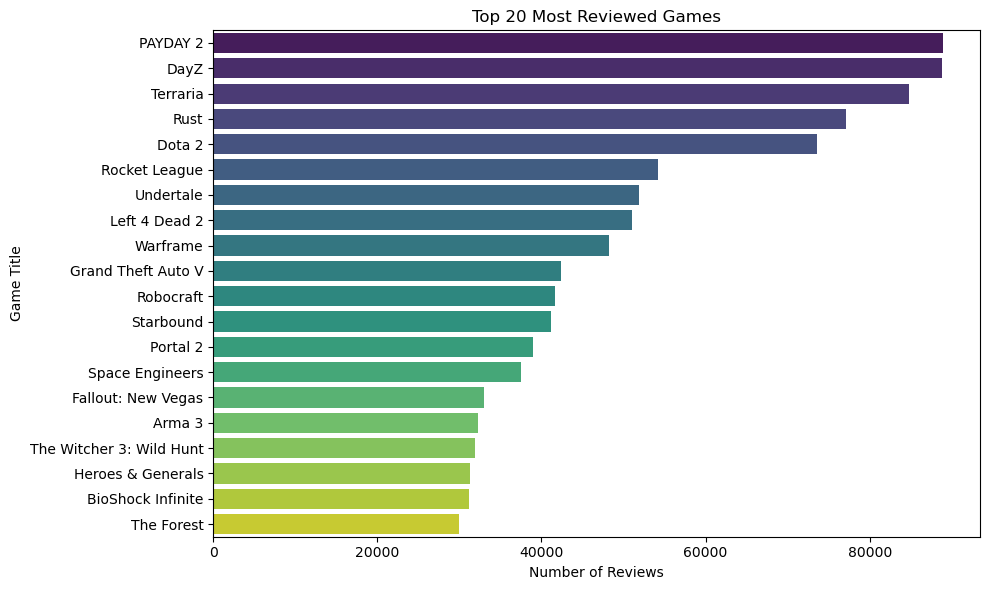

In [7]:
# Step 4: Most reviewed games
top_games = df['app_name'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_games.index, x=top_games.values, palette="viridis")
plt.title('Top 20 Most Reviewed Games')
plt.xlabel('Number of Reviews')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


In [9]:
# Step 4A: Remove 'early access review' mentions from review_text (case-insensitive)
df_cleaned = df[~df['review_text'].str.contains("early access review", case=False, na=False)]

print("Original dataset size:", df.shape[0])
print("After removing early access reviews:", df_cleaned.shape[0])


Original dataset size: 6417106
After removing early access reviews: 5392198


/var/folders/81/vg4jc45d24qfy4y09fmt7ftm0000gn/T/ipykernel_58716/2476482722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_games_cleaned.index, x=top_games_cleaned.values, palette="mako")


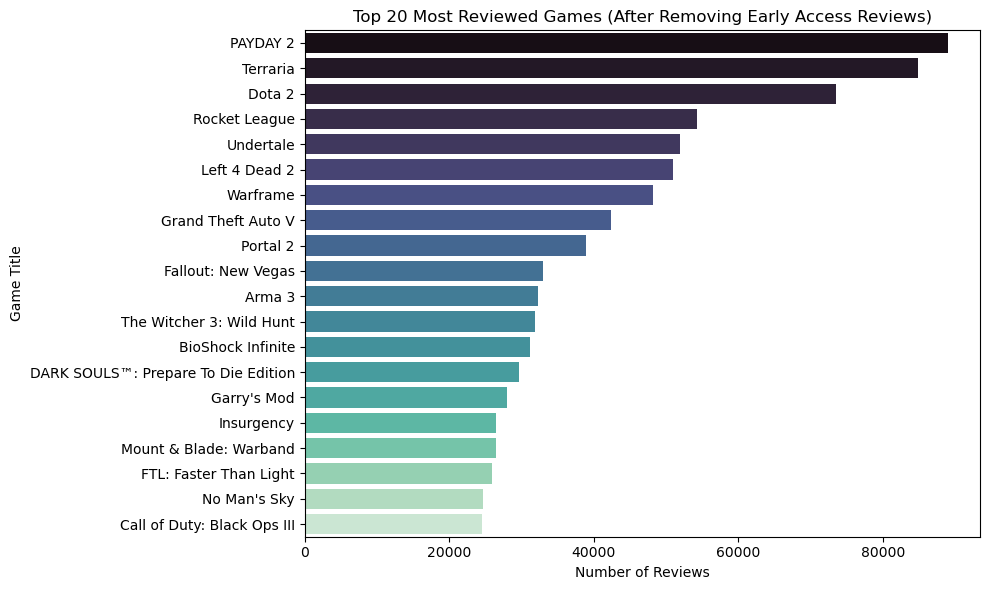

In [11]:
# Step 4B: Plot most reviewed games AFTER cleaning
top_games_cleaned = df_cleaned['app_name'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_games_cleaned.index, x=top_games_cleaned.values, palette="mako")
plt.title('Top 20 Most Reviewed Games (After Removing Early Access Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


/var/folders/81/vg4jc45d24qfy4y09fmt7ftm0000gn/T/ipykernel_58716/1087485832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['review_length_words'] = df_cleaned['review_text'].apply(lambda x: len(str(x).split()))
/var/folders/81/vg4jc45d24qfy4y09fmt7ftm0000gn/T/ipykernel_58716/1087485832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['review_length_chars'] = df_cleaned['review_text'].apply(lambda x: len(str(x)))


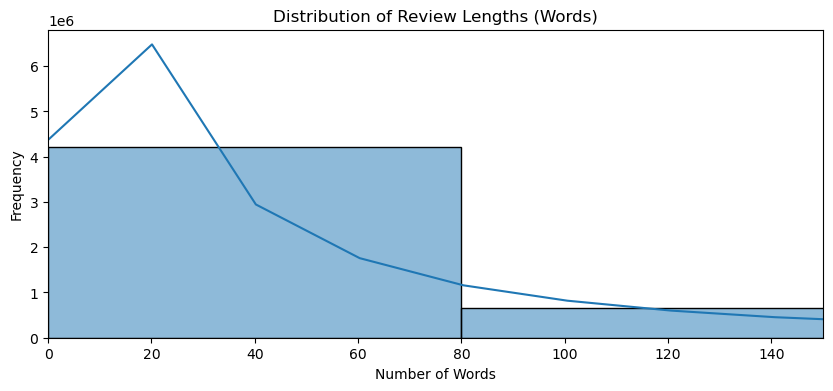

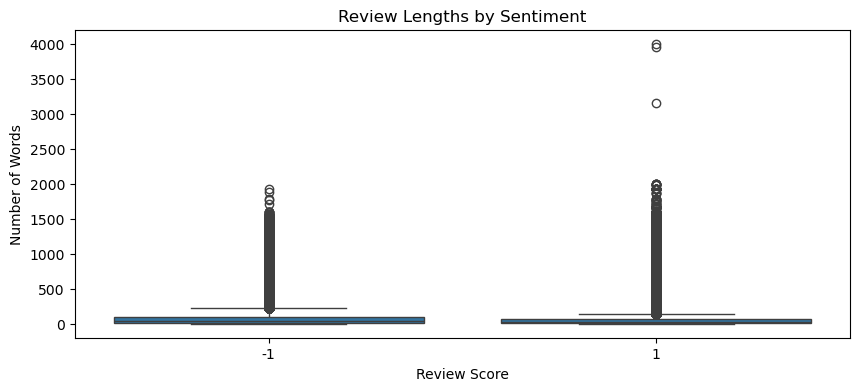

In [13]:
# Step 5: Analyze Review Lengths (in words and characters)
df_cleaned['review_length_words'] = df_cleaned['review_text'].apply(lambda x: len(str(x).split()))
df_cleaned['review_length_chars'] = df_cleaned['review_text'].apply(lambda x: len(str(x)))

# Plot histogram of word lengths
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['review_length_words'], bins=50, kde=True)
plt.title('Distribution of Review Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # Zoom in for clarity
plt.show()

# Optional: Compare by sentiment (review_score)
plt.figure(figsize=(10, 4))
sns.boxplot(x='review_score', y='review_length_words', data=df_cleaned)
plt.title('Review Lengths by Sentiment')
plt.xlabel('Review Score')
plt.ylabel('Number of Words')
plt.show()


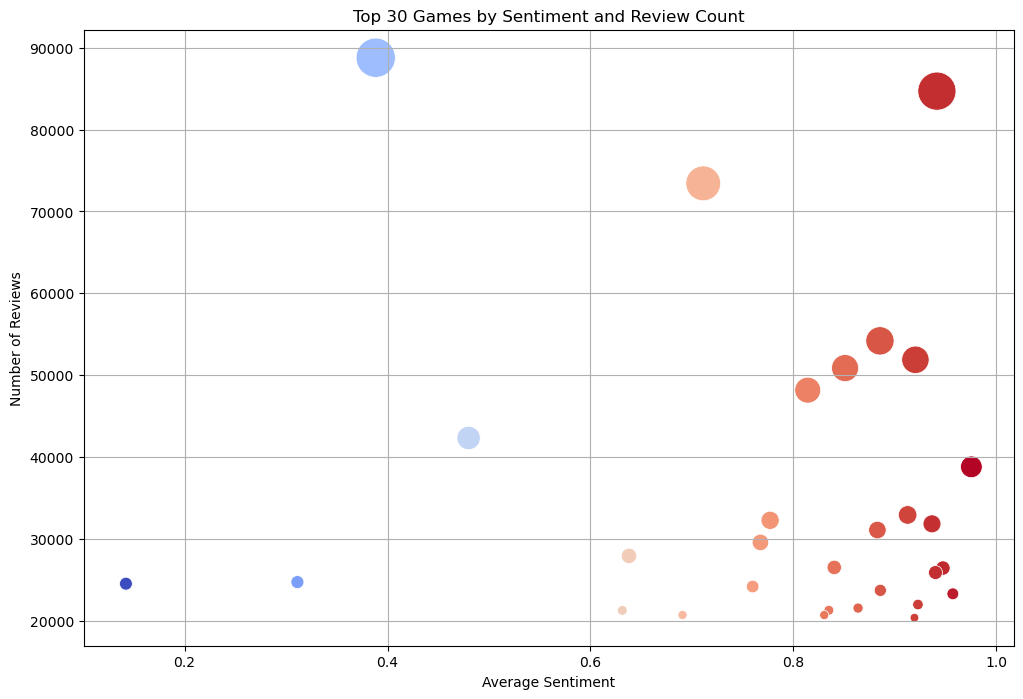

In [15]:
game_stats = df_cleaned.groupby('app_name').agg({
    'review_score': 'mean',
    'review_text': 'count'
}).rename(columns={'review_score': 'avg_sentiment', 'review_text': 'review_count'}).reset_index()

top_games = game_stats.sort_values(by='review_count', ascending=False).head(30)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_games, x='avg_sentiment', y='review_count', size='review_count',
                hue='avg_sentiment', palette='coolwarm', sizes=(40, 800), legend=False)

plt.title('Top 30 Games by Sentiment and Review Count')
plt.xlabel('Average Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


[nltk_data] Downloading package stopwords to /Users/kausy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/81/vg4jc45d24qfy4y09fmt7ftm0000gn/T/ipykernel_58716/1214964812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], ax=axes[0], palette="Greens_d")
/var/folders/81/vg4jc45d24qfy4y09fmt7ftm0000gn/T/ipykernel_58716/1214964812.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], ax=axes[1], palette="Reds_d")


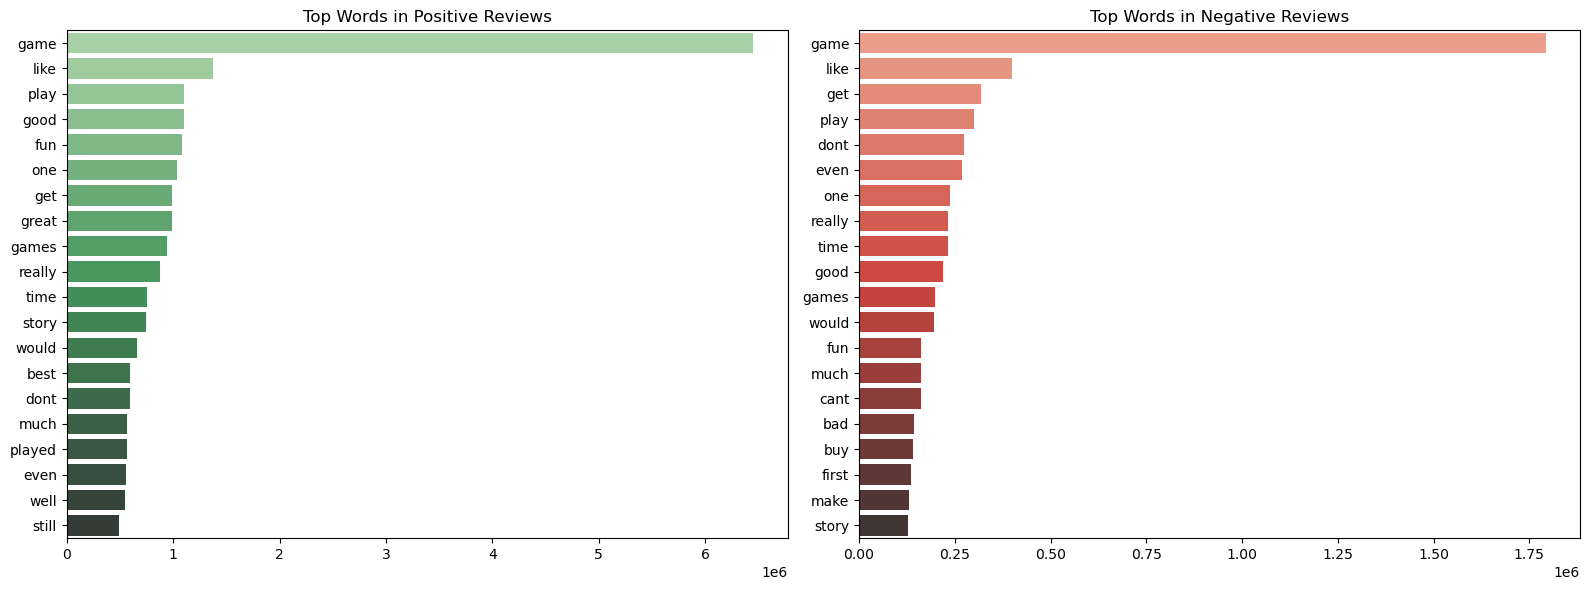

In [19]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    # Lowercase, remove non-alphabets, split
    tokens = re.sub(r'[^a-zA-Z\s]', '', str(text).lower()).split()
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Separate reviews
pos_reviews = df_cleaned[df_cleaned['review_score'] == 1]['review_text']
neg_reviews = df_cleaned[df_cleaned['review_score'] == -1]['review_text']

# Tokenize and flatten
pos_words = [word for review in pos_reviews for word in clean_and_tokenize(review)]
neg_words = [word for review in neg_reviews for word in clean_and_tokenize(review)]

# Most common words
top_pos = Counter(pos_words).most_common(20)
top_neg = Counter(neg_words).most_common(20)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], ax=axes[0], palette="Greens_d")
axes[0].set_title("Top Words in Positive Reviews")
sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], ax=axes[1], palette="Reds_d")
axes[1].set_title("Top Words in Negative Reviews")
plt.tight_layout()
plt.show()


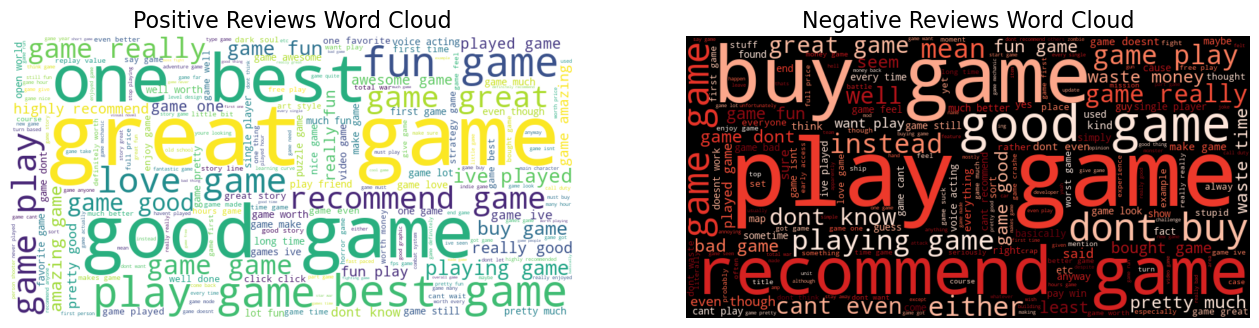

In [21]:
from wordcloud import WordCloud

# Generate word clouds
pos_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos_words))
neg_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(neg_words))

# Plot
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud', fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud', fontsize=16)
plt.show()
